In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

In [51]:
data = pd.read_csv('/content/sample_data/dataset pangan.csv')

data.tail()

,Tanggal,Beras,Beras Kualitas Bawah I (kg),Beras Kualitas Bawah II (kg),Beras Kualitas Medium I (kg),Beras Kualitas Medium II (kg),Beras Kualitas Super I (kg),Beras Kualitas Super II (kg),Bawang Merah,Bawang Merah Ukuran Sedang (kg),Bawang Putih,Bawang Putih Ukuran Sedang (kg),Cabai Merah,Cabai Merah Besar (kg),Cabai Merah Keriting (kg),Cabai Rawit,Cabai Rawit Hijau (kg),Cabai Rawit Merah (kg)
902,26/04/2021,11750,10750,10450,11800,11600,13050,12700,33300,33300,30250,30250,43100,45050,42750,57050,48750,65900
903,27/04/2021,11750,10750,10450,11800,11600,13050,12650,33250,33250,30200,30200,42000,44350,41650,56200,47750,65200
904,28/04/2021,11750,10750,10450,11800,11600,13050,12650,33200,33200,30150,30150,41400,43500,41050,56000,47600,65150
905,29/04/2021,11750,10750,10400,11750,11600,13050,12650,33100,33100,30250,30250,40700,43500,39950,55550,47500,64250
906,30/04/2021,11750,10750,10400,11800,11550,13050,12650,33100,33100,30200,30200,40150,42950,39250,55000,46850,63850


In [42]:
data.isnull().sum()

Tanggal                            0
Beras                              0
Beras Kualitas Bawah I (kg)        0
Beras Kualitas Bawah II (kg)       0
Beras Kualitas Medium I (kg)       0
Beras Kualitas Medium II (kg)      0
Beras Kualitas Super I (kg)        0
Beras Kualitas Super II (kg)       0
Bawang Merah                       0
Bawang Merah Ukuran Sedang (kg)    0
Bawang Putih                       0
Bawang Putih Ukuran Sedang (kg)    0
Cabai Merah                        0
Cabai Merah Besar (kg)             0
Cabai Merah Keriting  (kg)         0
Cabai Rawit                        0
Cabai Rawit Hijau (kg)             0
Cabai Rawit Merah (kg)             0
dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Tanggal                          907 non-null    object
 1   Beras                            907 non-null    object
 2   Beras Kualitas Bawah I (kg)      907 non-null    object
 3   Beras Kualitas Bawah II (kg)     907 non-null    object
 4   Beras Kualitas Medium I (kg)     907 non-null    object
 5   Beras Kualitas Medium II (kg)    907 non-null    object
 6   Beras Kualitas Super I (kg)      907 non-null    object
 7   Beras Kualitas Super II (kg)     907 non-null    object
 8   Bawang Merah                     907 non-null    object
 9   Bawang Merah Ukuran Sedang (kg)  907 non-null    object
 10  Bawang Putih                     907 non-null    object
 11  Bawang Putih Ukuran Sedang (kg)  907 non-null    object
 12  Cabai Merah                      907

## EDA

In [52]:
beras = data.loc[:,['Tanggal','Beras']]

In [53]:
beras.head()

,Tanggal,Beras
0,31/07/2017,11200
1,01/08/2017,11200
2,02/08/2017,11200
3,03/08/2017,11200
4,04/08/2017,11300


In [54]:
beras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tanggal  907 non-null    object
 1   Beras    907 non-null    object
dtypes: object(2)
memory usage: 14.3+ KB


In [55]:
beras['Tanggal'] = pd.to_datetime(beras['Tanggal'])

In [56]:
beras = beras.set_index('Tanggal')

In [57]:
beras.head()

,Beras
Tanggal,
2017-07-31,11200
2017-01-08,11200
2017-02-08,11200
2017-03-08,11200
2017-04-08,11300


In [58]:
beras['Beras'] = pd.to_numeric(beras['Beras'])

ValueError: ignored

In [59]:
beras.iloc[207:210,:]

,Beras
Tanggal,
2018-05-31,11700
2018-01-06,-
2018-04-06,11700


In [60]:
beras['Beras'].replace(['-'], 11700, inplace= True)

In [61]:
beras.iloc[207:210,:]

,Beras
Tanggal,
2018-05-31,11700
2018-01-06,11700
2018-04-06,11700


In [62]:
beras['Beras'] = pd.to_numeric(beras['Beras'])

In [63]:
beras.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 907 entries, 2017-07-31 to 2021-04-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Beras   907 non-null    int64
dtypes: int64(1)
memory usage: 14.2 KB


In [64]:
beras['Beras'].max()

13100

In [65]:
beras[beras['Beras']==beras['Beras'].max()]

,Beras
Tanggal,
2019-06-06,13100


In [66]:
beras.nlargest(5, ['Beras'])

,Beras
Tanggal,
2019-06-06,13100
2019-04-17,12600
2018-01-24,12100
2018-01-25,12100
2018-01-26,12100


In [67]:
beras.nsmallest(5, ['Beras'])

,Beras
Tanggal,
2017-01-12,10700
2017-08-14,11150
2017-07-31,11200
2017-01-08,11200
2017-02-08,11200


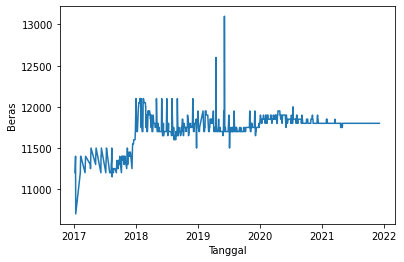

In [68]:
sns.lineplot(x=beras.index, y="Beras", data=beras)

In [69]:
df = beras.copy()
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

In [71]:
beras.head()

,Beras
Tanggal,
2017-07-31,11200
2017-01-08,11200
2017-02-08,11200
2017-03-08,11200
2017-04-08,11300


In [70]:
df.head()

,Beras,day_of_month,day_of_week,month,year
Tanggal,,,,,
2017-07-31,11200,31,0,7,2017
2017-01-08,11200,8,6,1,2017
2017-02-08,11200,8,2,2,2017
2017-03-08,11200,8,2,3,2017
2017-04-08,11300,8,5,4,2017


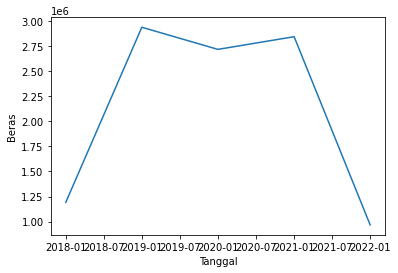

In [72]:
beras_by_year = df.resample('Y').sum()

sns.lineplot(x=beras_by_year.index, y="Beras", data=beras_by_year)

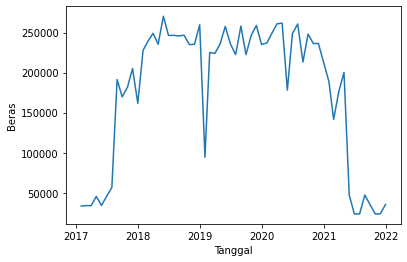

In [73]:
beras_by_month = df.resample('M').sum()

sns.lineplot(x=beras_by_month.index, y="Beras", data=beras_by_month)

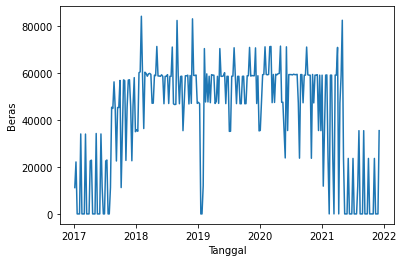

In [74]:
beras_by_week = df.resample('W').sum()

sns.lineplot(x=beras_by_week.index, y="Beras", data=beras_by_week)

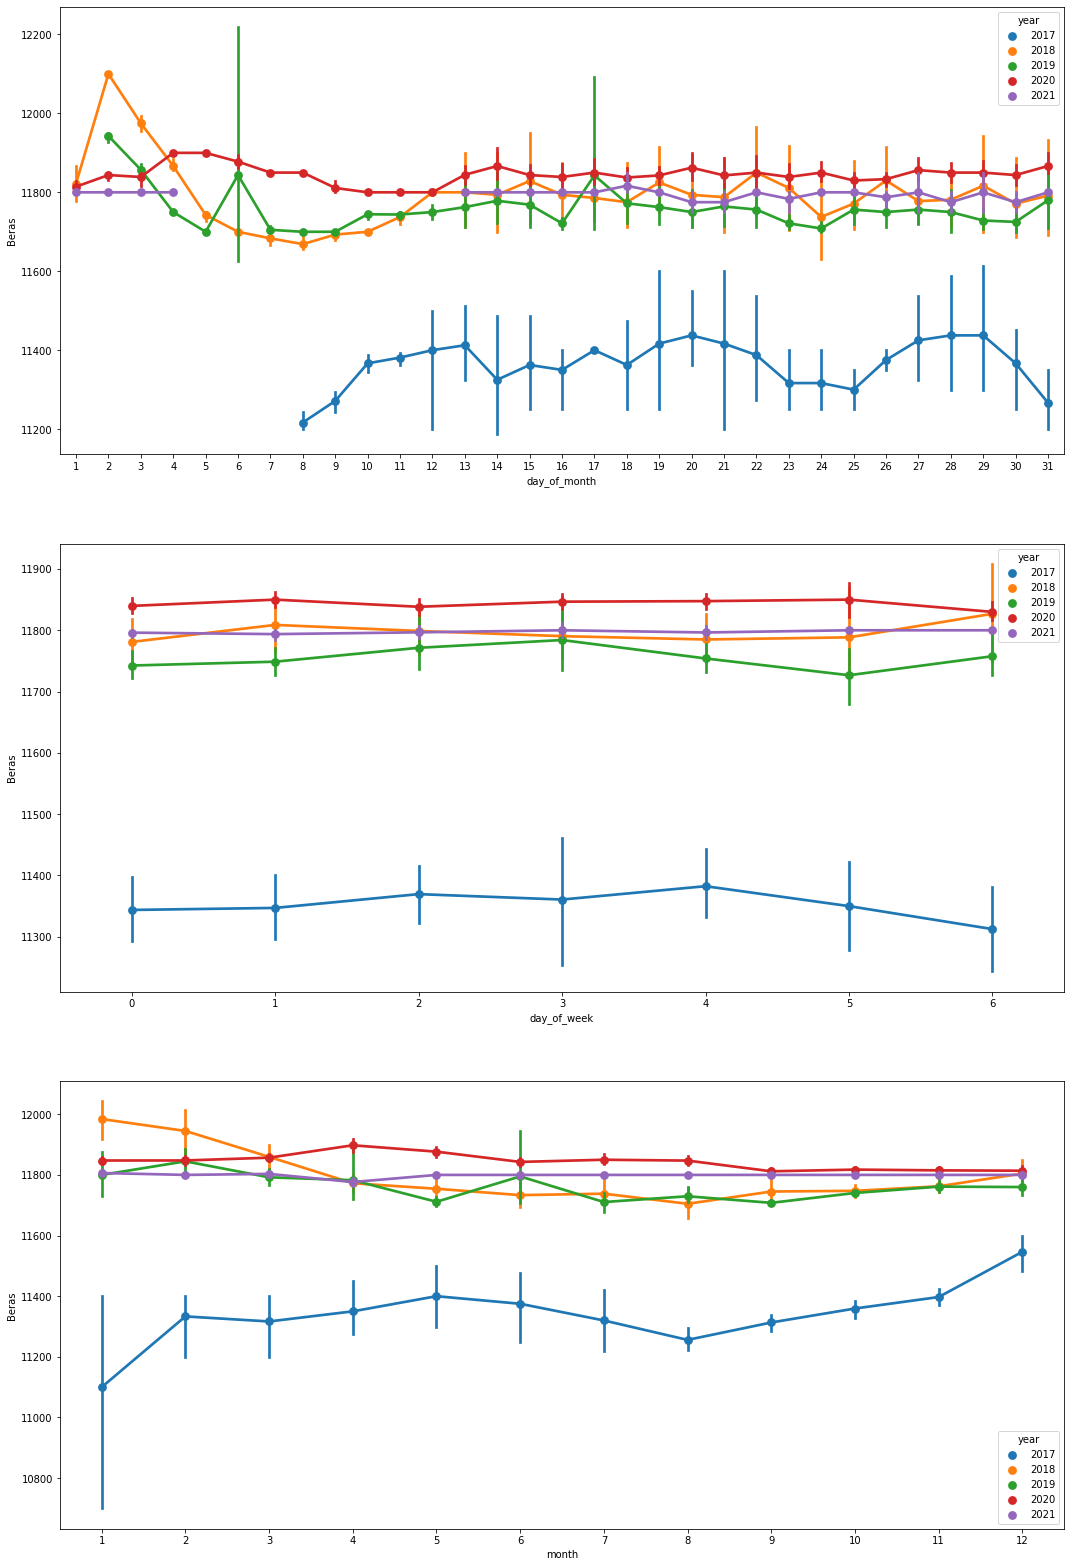

In [75]:
fig,(ax1, ax2, ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18, 28)

sns.pointplot(data=df, x='day_of_month', y='Beras', hue='year', ax=ax1)
sns.pointplot(data=df, x='day_of_week', y='Beras', hue='year', ax=ax2)
sns.pointplot(data=df, x='month', y='Beras', hue='year', ax=ax3)
#sns.pointplot(data=df, x='yea', y='Beras', hue='year', ax=ax3)

## Preprocessing

### Split data

In [76]:
train_size = int(len(beras) * 0.95)
test_size = len(beras) - train_size
train, test = beras.iloc[0:train_size], beras.iloc[train_size:len(beras)]
print(len(train), len(test))

861 46


In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(train[['Beras']])

train['Beras'] = scaler.transform(train[['Beras']])
test['Beras'] = scaler.transform(test[['Beras']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [78]:
train.tail()

,Beras
Tanggal,
2021-02-17,0.295434
2021-02-18,0.295434
2021-02-19,0.295434
2021-02-22,0.295434
2021-02-23,0.295434


In [79]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [80]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.Beras, time_steps)
X_test, y_test = create_dataset(test, test.Beras, time_steps)

print(X_train.shape, y_train.shape)

(851, 10, 1) (851,)


## Model1

In [95]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mae', optimizer='adam')

### Training

In [96]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Epoch 1/30
48/48 [==============================] - 2s 11ms/step - loss: 0.9008 - val_loss: 0.0466
Epoch 2/30
48/48 [==============================] - 0s 4ms/step - loss: 0.2134 - val_loss: 0.0364
Epoch 3/30
48/48 [==============================] - 0s 4ms/step - loss: 0.4070 - val_loss: 0.0435
Epoch 4/30
48/48 [==============================] - 0s 4ms/step - loss: 0.2416 - val_loss: 0.0216
Epoch 5/30
48/48 [==============================] - 0s 4ms/step - loss: 0.3388 - val_loss: 0.0655
Epoch 6/30
48/48 [==============================] - 0s 4ms/step - loss: 0.2156 - val_loss: 0.0267
Epoch 7/30
48/48 [==============================] - 0s 4ms/step - loss: 0.3298 - val_loss: 0.0537
Epoch 8/30
48/48 [==============================] - 0s 4ms/step - loss: 0.2012 - val_loss: 0.0305
Epoch 9/30
48/48 [==============================] - 0s 4ms/step - loss: 0.2654 - val_loss: 0.0629
Epoch 10/30
48/48 [==============================] - 0s 4ms/step - loss: 0.1952 - val_loss: 0.0328
Epoch 11/30
48/48 

### Evaluation

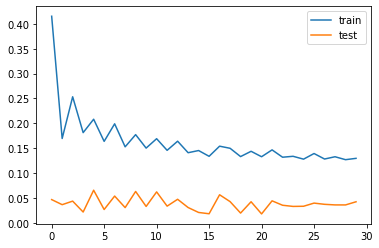

In [97]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [139]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [140]:
## BELOM DI RUN (BELOM DI INVERS)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [141]:
## performannce
import math
from sklearn.metrics import mean_absolute_error
math.sqrt(mean_absolute_error(y_train,train_predict))

108.40627381795848

In [142]:
math.sqrt(mean_absolute_error(y_test,test_predict))

108.61630097563634

In [144]:
## tidak inverse
y_pred = model.predict(X_test)

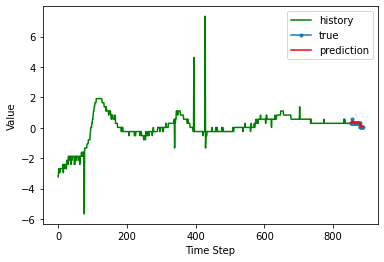

In [145]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
#plt.figure(figsize=(20,10))
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()

## Model2

In [146]:
model2 = keras.Sequential()
model2.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model2.add(keras.layers.Dropout(rate=0.2))
model2.add(keras.layers.Dense(units=1))
model2.compile(loss='mae', optimizer='adam')

In [147]:
history2 = model2.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
24/24 [==============================] - 4s 32ms/step - loss: 0.8667 - val_loss: 0.0221
Epoch 2/30
24/24 [==============================] - 0s 7ms/step - loss: 0.2566 - val_loss: 0.0431
Epoch 3/30
24/24 [==============================] - 0s 7ms/step - loss: 0.2438 - val_loss: 0.0194
Epoch 4/30
24/24 [==============================] - 0s 6ms/step - loss: 0.2895 - val_loss: 0.0245
Epoch 5/30
24/24 [==============================] - 0s 6ms/step - loss: 0.2436 - val_loss: 0.0251
Epoch 6/30
24/24 [==============================] - 0s 6ms/step - loss: 0.3469 - val_loss: 0.0224
Epoch 7/30
24/24 [==============================] - 0s 6ms/step - loss: 0.2223 - val_loss: 0.0203
Epoch 8/30
24/24 [==============================] - 0s 7ms/step - loss: 0.2299 - val_loss: 0.0189
Epoch 9/30
24/24 [==============================] - 0s 6ms/step - loss: 0.2313 - val_loss: 0.0190
Epoch 10/30
24/24 [==============================] - 0s 6ms/step - loss: 0.2119 - val_loss: 0.0203
Epoch 11/30
24/24 

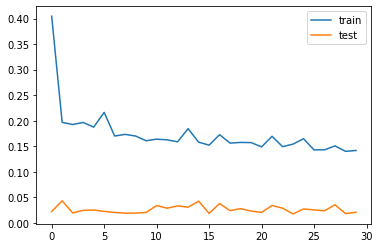

In [148]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend();

In [150]:
train_predict=model2.predict(X_train)
test_predict=model2.predict(X_test)

In [151]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [152]:
math.sqrt(mean_absolute_error(y_train,train_predict))

108.40876082658482

In [153]:
math.sqrt(mean_absolute_error(y_test,test_predict))

108.6008146031377

In [ ]:
y_pred2 = model2.predict(X_test)